# **LAB 2 - PART 2 Gradient Descent**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.animation import FuncAnimation
from IPython.display import display, Image

### **Read file, Explore Data, Data Cleansing**

In [ ]:
### START CODE HERE ###
df = pd.read_csv("/content/Gradient-Descent-example-data.csv")
### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment
0,1,-1,846
1,2,-4,424
2,3,2,1560
3,4,-3,523
4,5,1,1012
5,6,-2,663
6,7,4,1624
7,8,5,1882
8,9,2,1263


### **Create a `Bitcoin Increment_standardize`columns**

In [ ]:
### START CODE HERE ###
standardize_scaler = preprocessing.StandardScaler()
df["Bitcoin Increment_standardize"] = standardize_scaler.fit_transform(df[['Bitcoin Increment']])
### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize
0,1,-1,846,-0.493265
1,2,-4,424,-1.351452
2,3,2,1560,0.958738
3,4,-3,523,-1.150124
4,5,1,1012,-0.155685
5,6,-2,663,-0.865418
6,7,4,1624,1.088890
7,8,5,1882,1.613563
8,9,2,1263,0.354753


### **Gradient Descent**

$$
h_{\theta} = \theta_1x + \theta_0
\\
J(\theta) = (y-h{(x)})^2
\\
\theta_{j} \leftarrow \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
$$
Demonstrate a single step of Gradient Descent. Then plot the graph that shows the model before and after the update parameters

Let's  $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 = 0.4, \theta_1 = 0.8, learning\ rate = 0.01$

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>



</details>

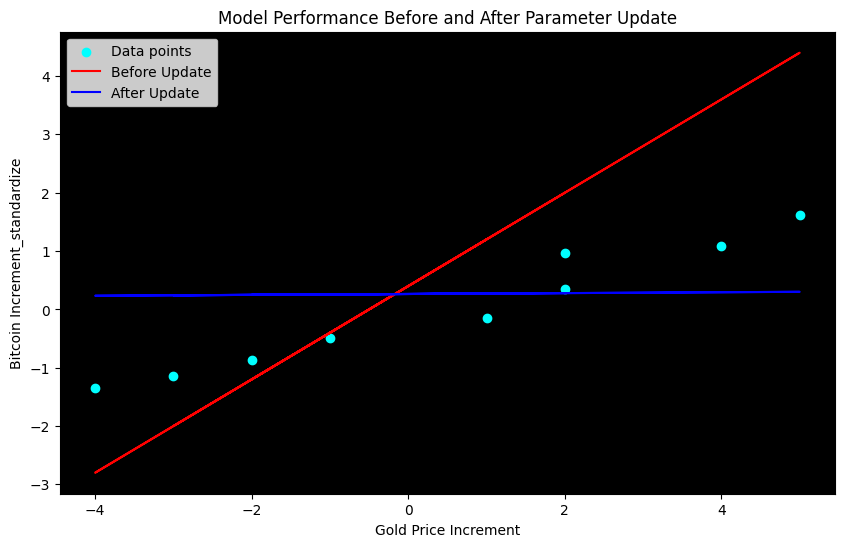

In [ ]:
### START CODE HERE ###
theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01

y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']

#y_predict
h_before = theta_0 + theta_1 * x

grad_J_theta_1 = sum(2 * ( y - ( theta_1 * x + theta_0 )) * (-x))
grad_J_theta_0 = sum(2 * ( y - ( theta_1 * x + theta_0 )) * (-1))

theta_1 = theta_1 - (alpha * grad_J_theta_1)
theta_0 = theta_0 - (alpha * grad_J_theta_0)

h_after = theta_0 + theta_1 * x

plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='cyan', label='Data points')
plt.plot(x, h_before, color='red', linestyle='-', label='Before Update')
plt.plot(x, h_after, color='blue', linestyle='-', label='After Update')

plt.xlabel('Gold Price Increment')
plt.ylabel('Bitcoin Increment_standardize')
plt.title('Model Performance Before and After Parameter Update')
plt.legend()

plt.gca().set_facecolor('black')

plt.show()



### END CODE HERE ###

Now let's create N iterations of gradient descent, <span style='color: orange;'>***print all parameters and loss every iteration***</span> then <span style='color: orange;'>***plot the loss history***</span> and <span style='color: orange;'>***save the animation to show the change of model in each iteration to .gif***</span>.

Let's  $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 \in [0,1], \theta_1 \in [0,1], learning\ rate = alpha$


In [ ]:
### START CODE HERE ###
def gradient_descent(x, y, num_iterations, alpha,theta_1,theta_0)  :

       theta_1_history = []
       theta_0_history = []
       loss_history = []

       for i in range(num_iterations):

            predictions = theta_1 * x + theta_0

            grad_J_theta_1 = sum(2 * ( y - ( theta_1 * x + theta_0 )) * (-x))
            grad_J_theta_0 = sum(2 * ( y - ( theta_1 * x + theta_0 )) * (-1))

            theta_1 = theta_1 - (alpha * grad_J_theta_1)
            theta_0 = theta_0 - (alpha * grad_J_theta_0)

            loss = (1/len(y)) * sum((y - predictions)**2)

            theta_1_history.append(theta_1)
            theta_0_history.append(theta_0)
            loss_history.append(loss)

       return theta_1_history , theta_0_history , loss_history , theta_0 , theta_1

### END CODE HERE ###

In [ ]:
### START CODE HERE ###
theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01
num_iterations = 30

y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']

theta_1_history , theta_0_history , loss_history , theta_0 , theta_1 = gradient_descent(x, y, num_iterations, alpha,theta_1,theta_0)
# use  gradient_descent() here to estimate theta_0, theta_1 @all iterations


### END CODE HERE ###

### Show Figure of scatter plot of data and regression model (Red line) at each iteration
Try figure animation using FuncAnimation()**

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>



</details>

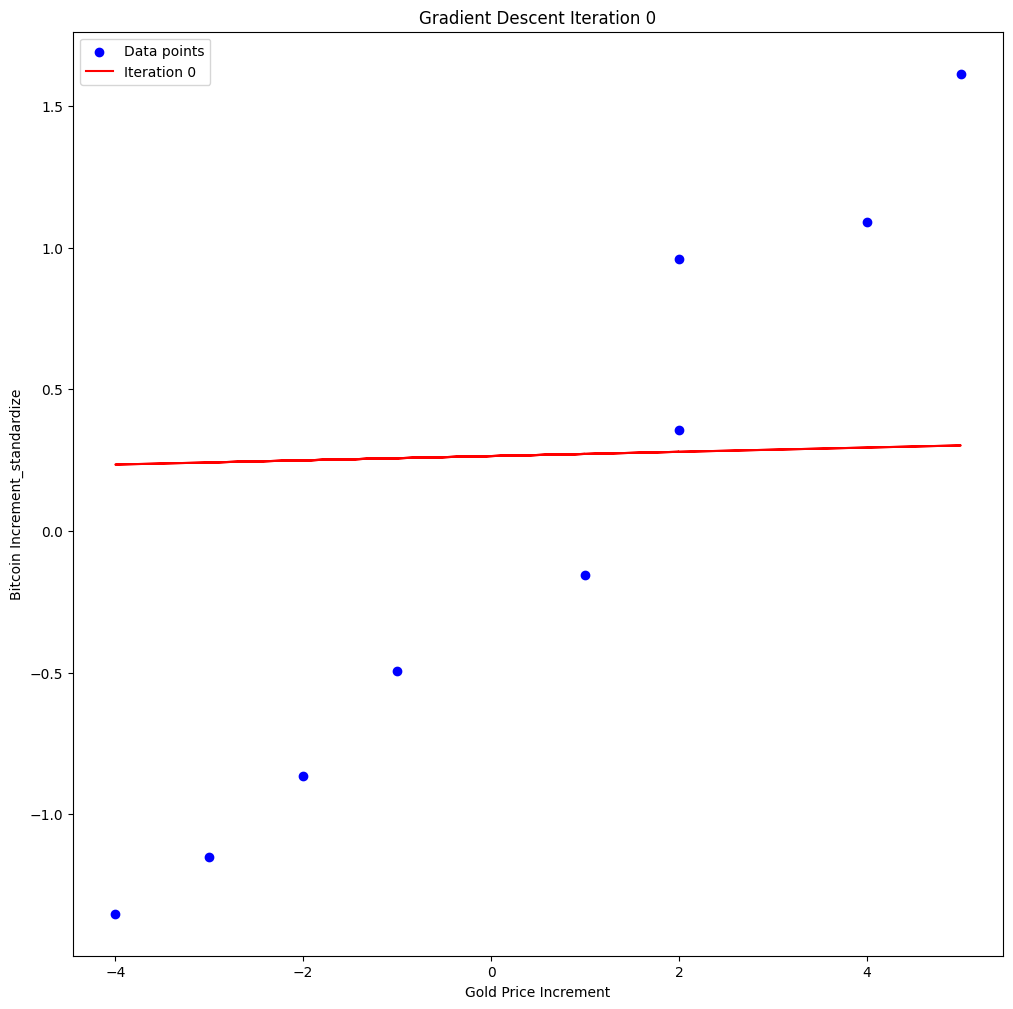

In [ ]:
### START CODE HERE ###
def update_plot(frame):
    plt.cla()  # Clear the current axes

    # Plotting the data points
    plt.scatter(x, y, color='blue', label='Data points')

    # Plotting the linear regression line
    y_pred = theta_0_history[frame] + theta_1_history[frame] * x
    plt.plot(x, y_pred, color='red', label=f'Iteration {frame}')

    plt.title(f'Gradient Descent Iteration {frame}')
    plt.xlabel('Gold Price Increment')
    plt.ylabel('Bitcoin Increment_standardize')
    plt.legend()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Set the axis limits
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

# Animate
ani = FuncAnimation(fig, update_plot, frames=num_iterations, blit=False, repeat=False, interval=100)

# Show the animation
ani.save("/content/animation.gif")
### END CODE HERE ###

### Create the `Predicted_standardize` columns from the best parameters set

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize |
|----------------------|-------------------|-------------------------------|------------------------|
| -1                | 846                           | -0.493265              | -0.169845              |
| -4                | 424                           | -1.351452              | -1.063912              |
| 2                 | 1560                          | 0.958738               | 0.724223               |
| -3                | 523                           | -1.150124              | -0.765890              |



</details>

In [ ]:
### START CODE HERE ###

df["Predicted_standardize"] = theta_0 + theta_1 * df['Gold Price Increment']


### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize,Predicted_standardize
0,1,-1,846,-0.493265,-0.477972
1,2,-4,424,-1.351452,-1.473903
2,3,2,1560,0.958738,0.517959
3,4,-3,523,-1.150124,-1.141926
4,5,1,1012,-0.155685,0.185982
5,6,-2,663,-0.865418,-0.809949
6,7,4,1624,1.088890,1.181913
7,8,5,1882,1.613563,1.513890
8,9,2,1263,0.354753,0.517959


Create the `Predicted` that inverse standardize of `Predicted_standardize`


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize | Predicted       |
|----------------------|-------------------|-------------------------------|------------------------|-----------------|
| -1                | 846                           | -0.493265              | -0.239102	   | 970.981043| 1005.037081     |
| -4                | 424                           | -1.351452              | -1.148680	   | 523.710247     |
| 2                 | 1560                          | 0.958738               | 0.670476	       | 1418.251840     |
| -3                | 523                           | -1.150124              | -0.845487	   | 672.800513     |



</details>

In [ ]:
### START CODE HERE ###
mean = df['Bitcoin Increment'].mean()
std = df['Bitcoin Increment'].std()


df['Predicted'] = df['Predicted_standardize'] * std + mean

df = df.drop(columns='No')
df = df.reset_index(drop=True)
### END CODE HERE ###

df

,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize,Predicted_standardize,Predicted
0,-1,846,-0.493265,-0.477972,839.262894
1,-4,424,-1.351452,-1.473903,319.822021
2,2,1560,0.958738,0.517959,1358.703767
3,-3,523,-1.150124,-1.141926,492.968979
4,1,1012,-0.155685,0.185982,1185.556809
5,-2,663,-0.865418,-0.809949,666.115936
6,4,1624,1.088890,1.181913,1704.997682
7,5,1882,1.613563,1.513890,1878.144640
8,2,1263,0.354753,0.517959,1358.703767


## Question
1. What would be the iteration that gives the best parameters?
2. What are the best regression model parameters?
3. Show regression model equation of best parameters compared to the regression model equation from the last iteration (#30)

In [ ]:
# Ans
1. ดูจากค่า loss ที่น้อยที่สุด โดยค่านั้นจะน้อยที่าุดเริ่มเริ่มคงที่ที่ iteration 26-30
2. best regression parameter theta_0 = 0.387938 theta_1 = 0.704995
3. Regression model equation  ที่มี best parameters: y = 0.387938 + 0.704995*x อยู่ใน iteration ที่ 30 ซึง่เป็นอันเดียวกับ last